In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_data=pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# нахождение пропущеных значений
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# выбираем данные для обучения (axis=1 по столбцам)
X=titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y=titanic_data.Survived

In [6]:
# избежание номинативных переменных (One-hot encoding)
X = pd.get_dummies(X)

In [7]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [8]:
# Заполнение пропущенных значений в поле age медианным значением возраста
X=X.fillna({'Age' : X.Age.median()})

In [9]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


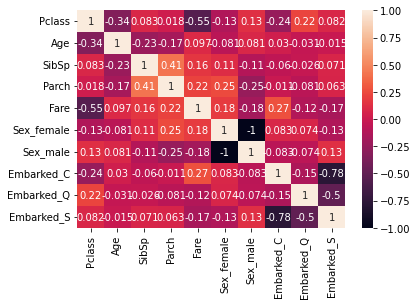

In [11]:
#корреляции между стобцами в данных
import seaborn as sns
X.corr()
sns.heatmap(X.corr(),annot =True);

In [12]:
len(list(X))

10

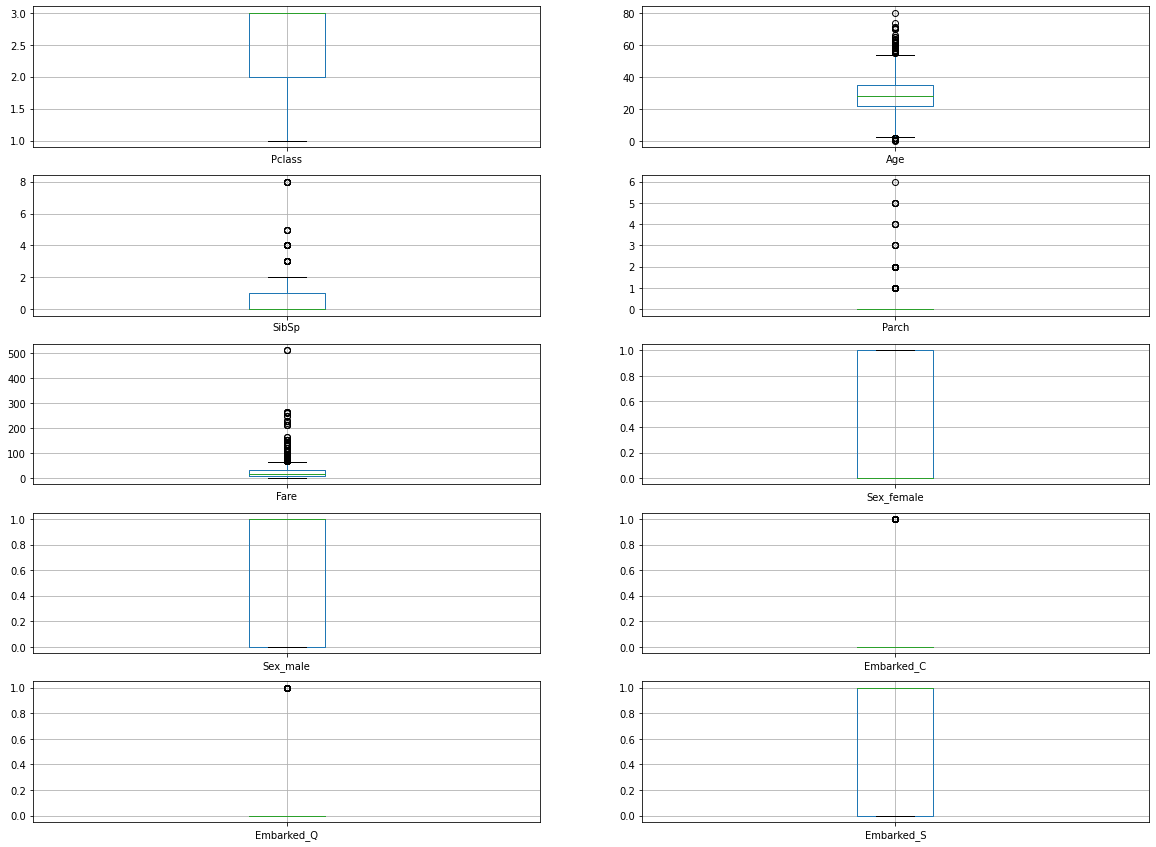

In [13]:
# ящики с усами
plt.figure(figsize=(20, 15))
for k,name in enumerate(list(X)):
    plt.subplot(5,2,k+1)
    X.boxplot(column = name)

<Figure size 1440x1080 with 0 Axes>

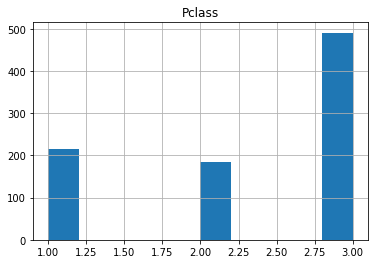

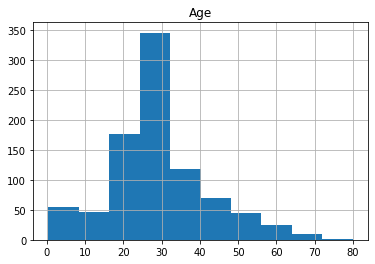

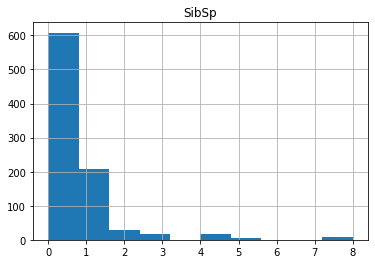

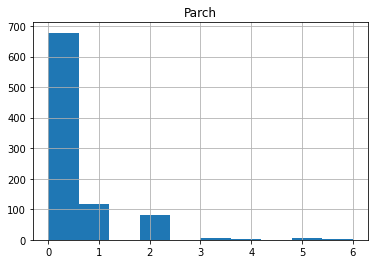

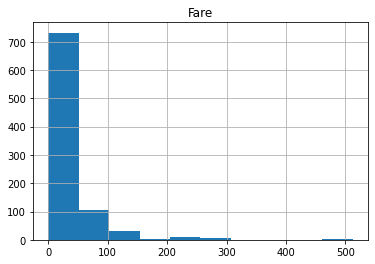

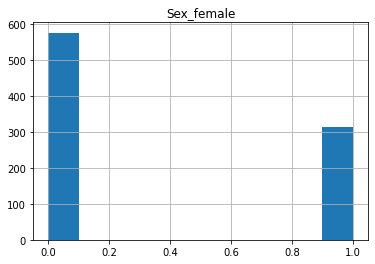

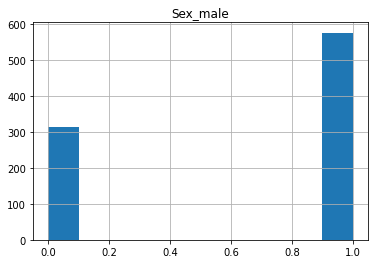

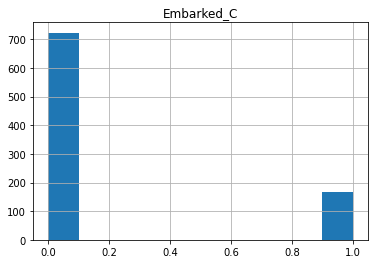

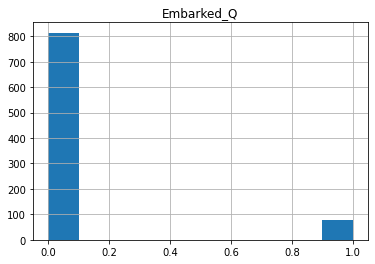

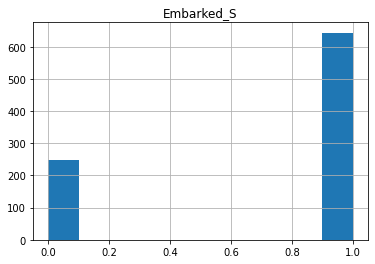

In [14]:
# распределения значений в колонках
plt.figure(figsize=(20, 15))
for name in list(X):
    X.hist(column = name)

In [15]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [16]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [17]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [18]:
# параметры дерева
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [19]:
# список атрибутов дерева
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_sample

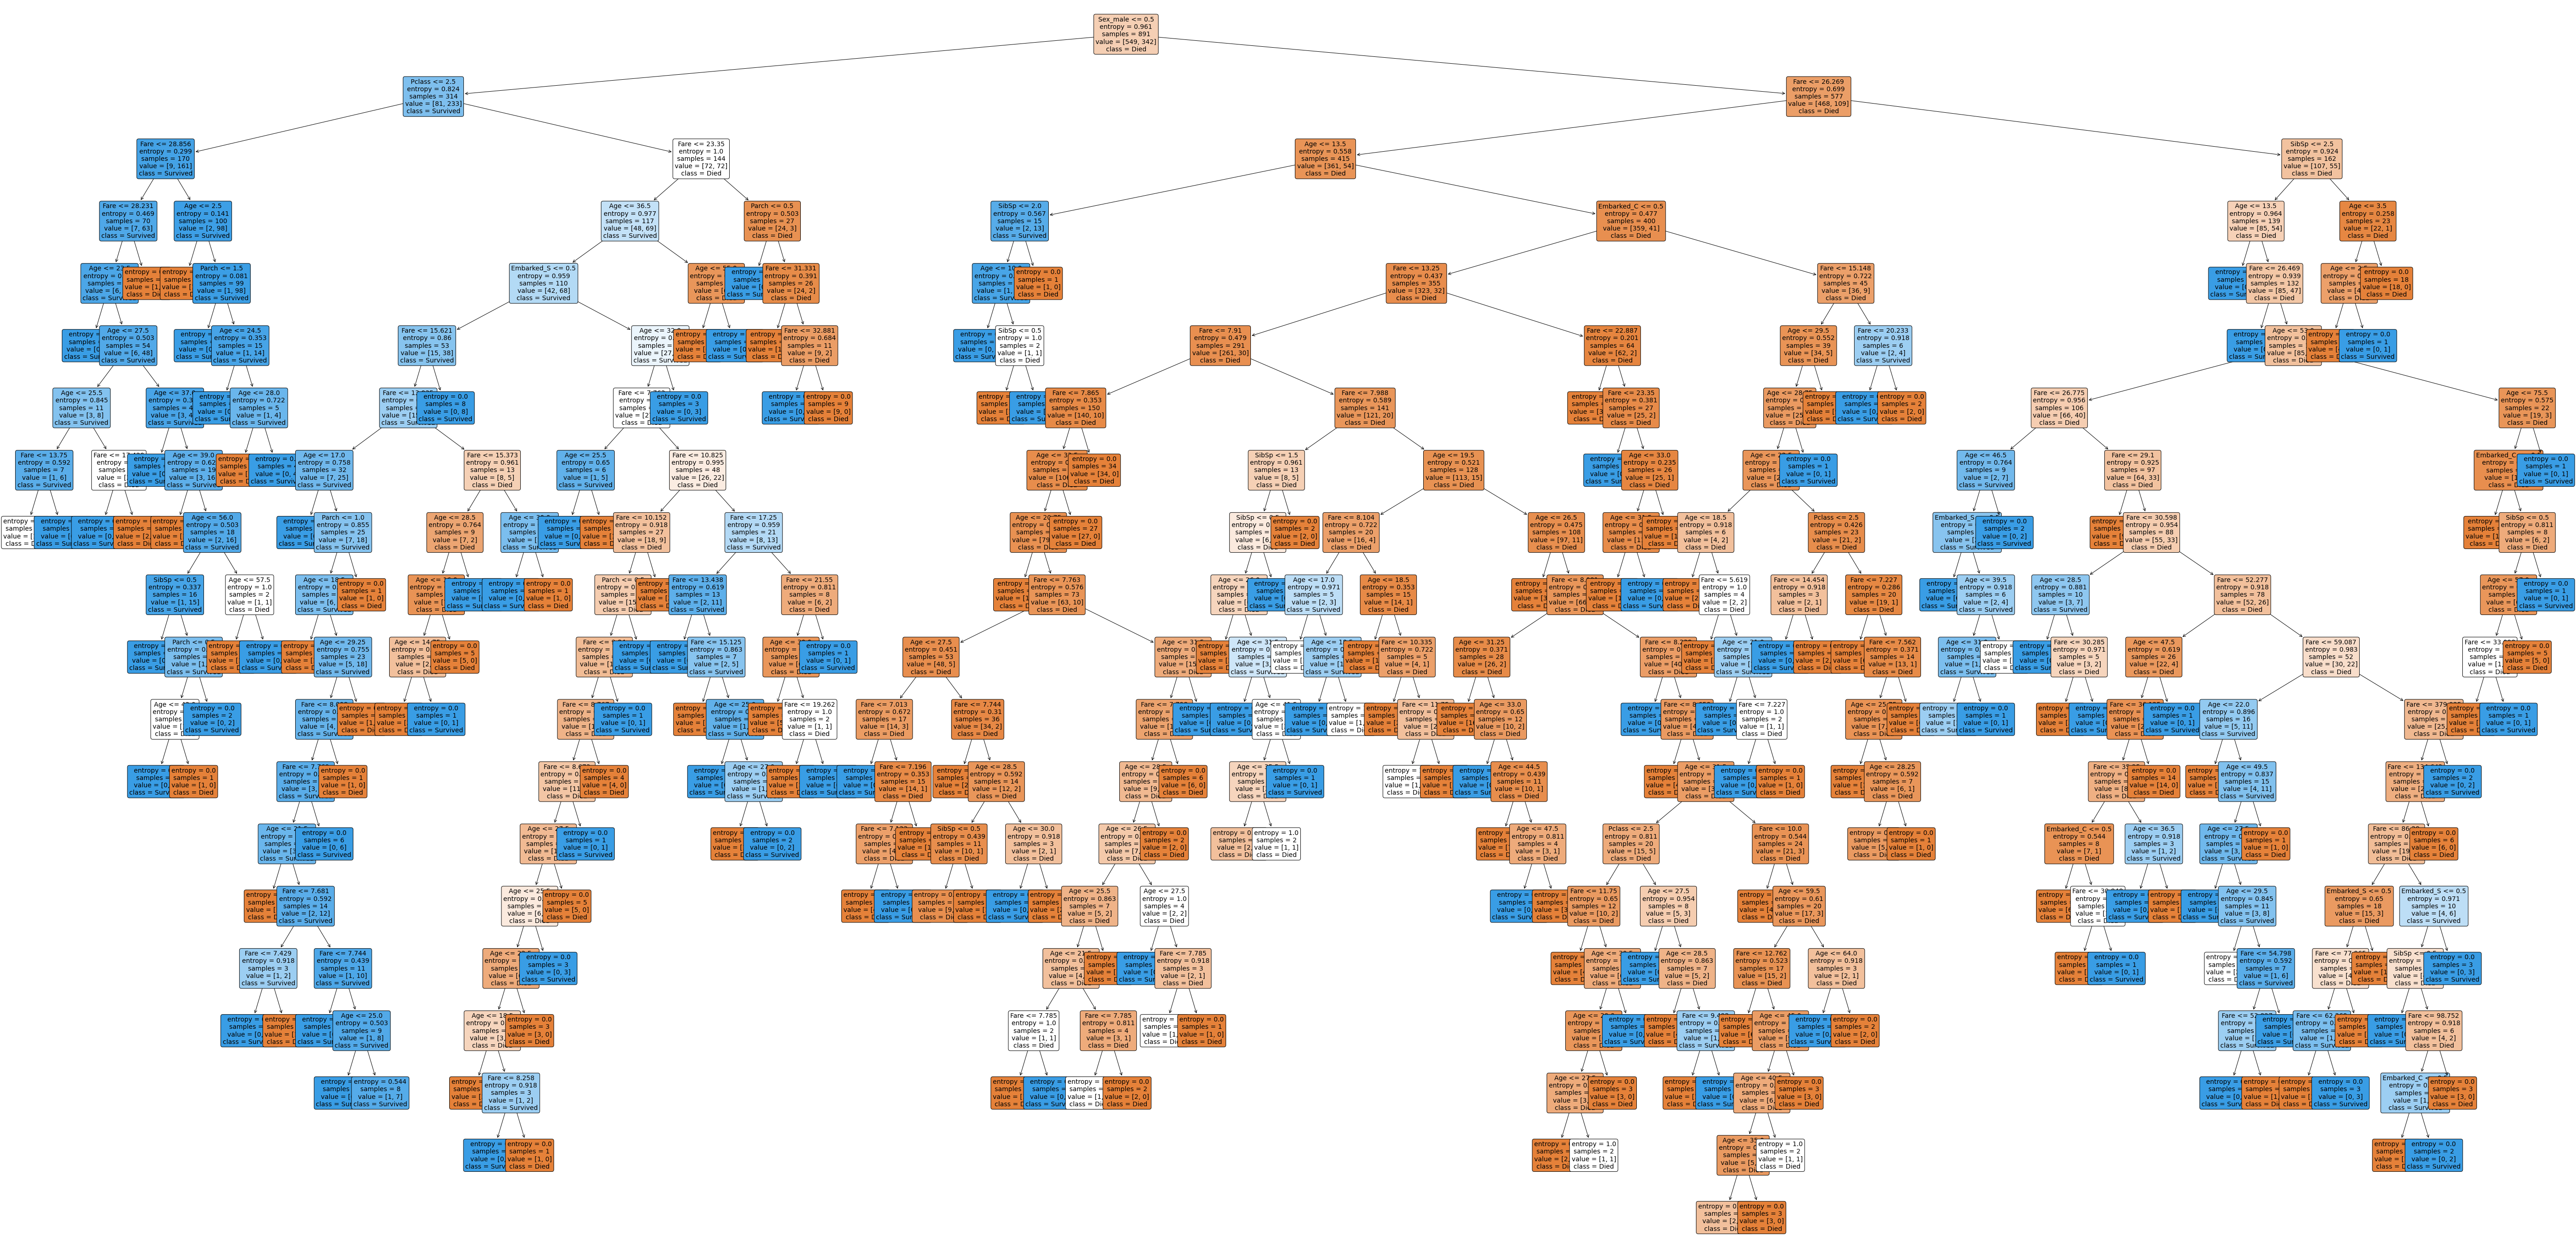

In [20]:
# Визуализация
plt.figure(figsize=(100, 50))
tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Died', 'Survived'], 
               filled=True,
               rounded=True,
               fontsize = 14)
plt.show()

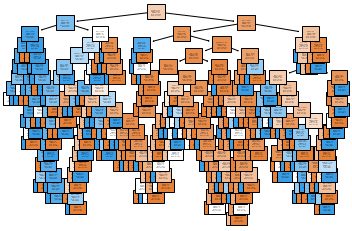

In [21]:
tree.plot_tree(clf,feature_names=list(X),class_names=['Survived','Died'],filled=True,fontsize=1);

In [22]:
# Подбор параметров за счет тестирования модели на другой выборке(неверное суждение)
# Разбитие нашей выборки на тестовую и train части
from sklearn.model_selection import train_test_split

In [23]:
# 33 процента из всей выборки будет 'тестом'
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.33, random_state = 42)

In [24]:
X_train.shape

(596, 10)

In [25]:
X_test.shape

(295, 10)

In [26]:
# Валидация (очень упрощенная версия)
# Сравнение предсказанных ответов на train и на test
clf.score(X,y)

0.9797979797979798

In [27]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
clf.score(X_train,y_train)

0.9798657718120806

In [29]:
clf.score(X_test,y_test)

0.7694915254237288

In [30]:
# процент упал, изза переобучения на конкретной выборке
# подгон параметра max_depth
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [31]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [32]:
clf.score(X_train,y_train)

0.8238255033557047

In [33]:
clf.score(X_test,y_test)

0.8203389830508474

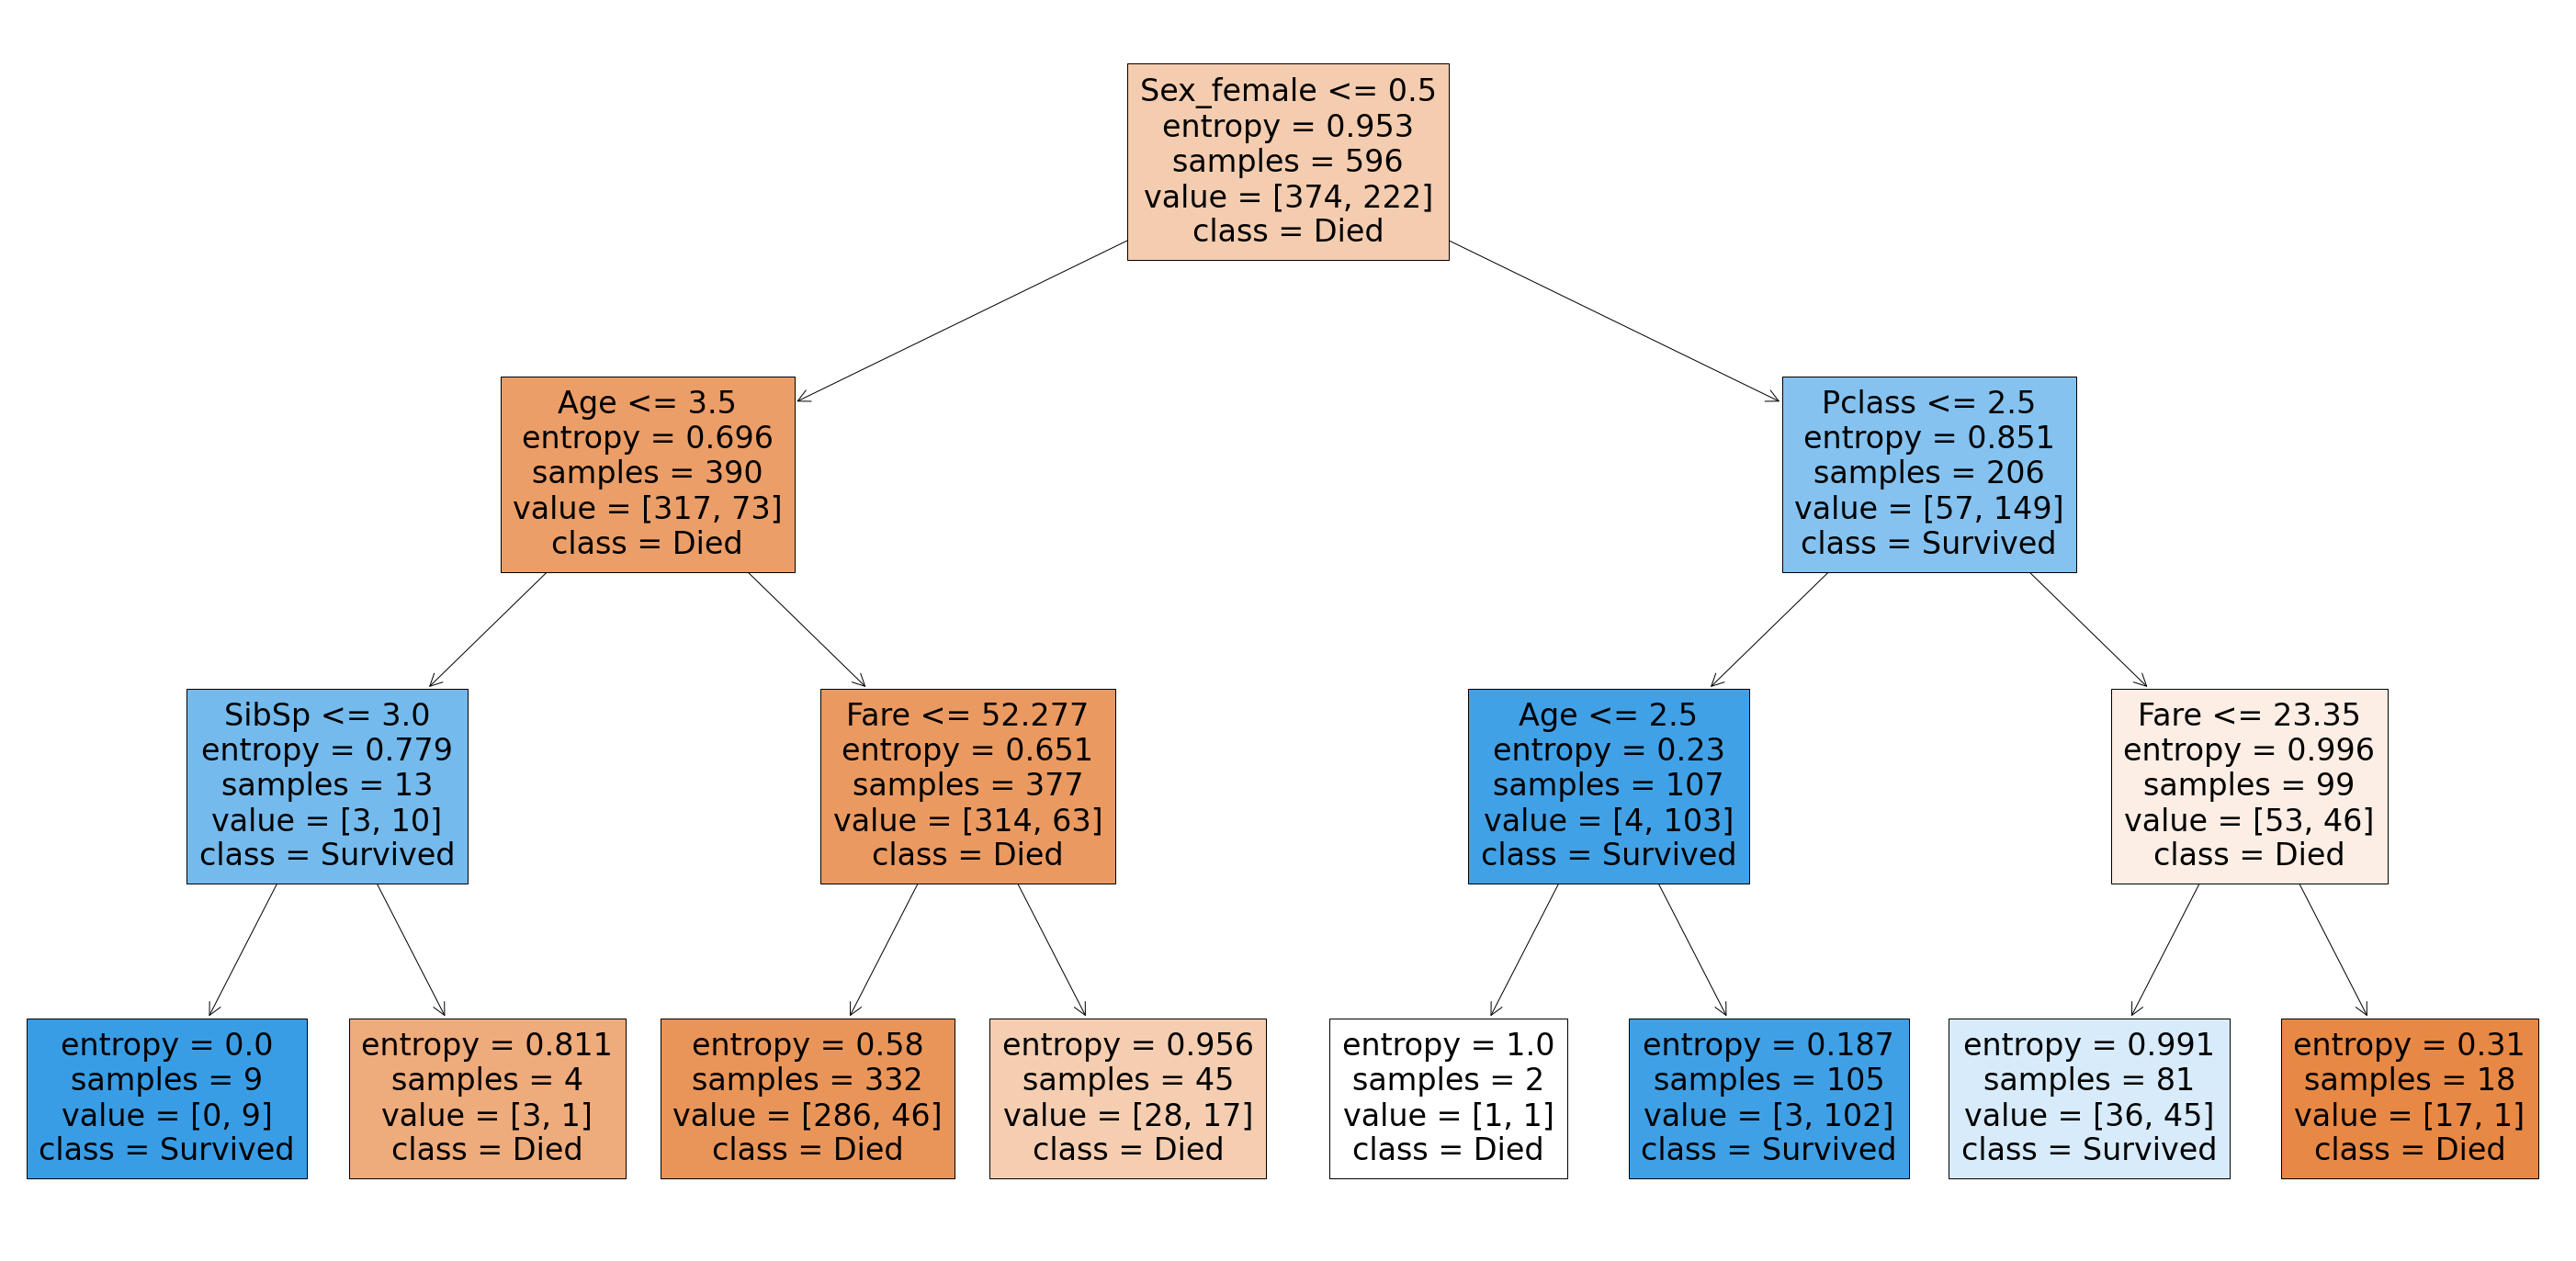

In [34]:
# Визуализация
plt.figure(figsize=(50,25))
tree.plot_tree(clf,feature_names=list(X_train),class_names=['Died','Survived'],filled=True)
plt.show()

In [35]:
# Еще проверки
max_depth_values = range(1 , 100)

In [36]:
scores_data = pd.DataFrame()

In [37]:
# пытаемся определить наилучшие параметры max_depth
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score' : [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [38]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [39]:
# изменение формата df (из двух колонок делаем одну, но увеличиваем количество записей)
scores_data_long = pd.melt(scores_data,
                           id_vars = ['max_depth'], 
                           value_vars = ['train_score','test_score'],
                           var_name = 'set_type',
                           value_name = 'score')

In [40]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

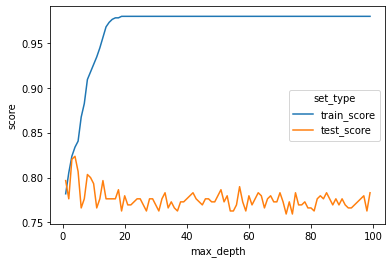

In [41]:
#отрисовка графиков hue - цвет
sns.lineplot(x='max_depth',y='score',hue='set_type',data=scores_data_long)

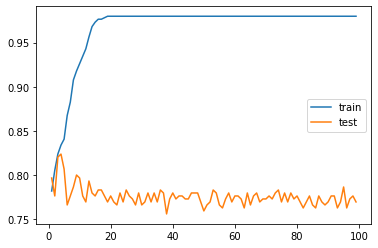

In [42]:
# другой вариант записи поиска подходящего параметра
max_depth_values = range(1, 100)
train_val = []
test_val = []
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_val.append(clf.score(X_train, y_train))
    test_val.append(clf.score(X_test, y_test))
ax = sns.lineplot(x=max_depth_values, y=train_val, label='train')
ax = sns.lineplot(x=max_depth_values, y=test_val, label='test')

In [43]:
# решаем проблемму переобучения используя cross-validation
from sklearn.model_selection import cross_val_score 

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.33, random_state = 42)

In [45]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [46]:
# Кроссвалидация на train множестве с fold=5( на 5 частей разобьется train set)
cross_val_score(clf,X_train,y_train,cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [47]:
# усредняем значения кроссвалидации
cross_val_score(clf,X_train,y_train,cv=5).mean()

0.7886274509803922

In [48]:
scores_data = pd.DataFrame()

In [49]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    
    mean_cross_val_score=cross_val_score(clf,X_train,y_train,cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score' : [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [50]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.800392


In [51]:
scores_data_long = pd.melt(scores_data,
                           id_vars = ['max_depth'], 
                           value_vars = ['train_score','test_score','cross_val_score'],
                           var_name = 'set_type',
                           value_name = 'score')

In [52]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [53]:
scores_data_long.query("set_type =='cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.803739
205,8,cross_val_score,0.802045
206,9,cross_val_score,0.791947
207,10,cross_val_score,0.796989


<AxesSubplot:xlabel='max_depth', ylabel='score'>

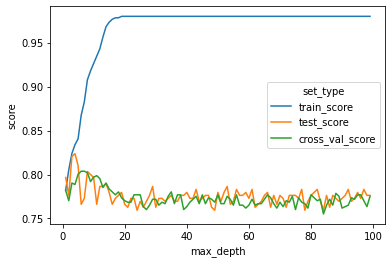

In [54]:
sns.lineplot(x='max_depth',y='score',hue='set_type',data=scores_data_long)

In [55]:
best_clf= tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)

In [56]:
best_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [57]:
best_clf.score(X_test,y_test)

0.8067796610169492

In [58]:
# using GridSearch to find best parameters for cross-validations
# повторяет логику при подборе параметров описанную выше

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
clf= tree.DecisionTreeClassifier()

In [61]:
clf?

In [62]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [63]:
parametrs = {'criterion' : ['gini','entropy'], 'max_depth' : range(1,30), 'min_samples_split' : range(15,25) , 'min_samples_leaf' : range(15,25)}

In [64]:
grid_search_cv_clf =GridSearchCV(clf,parametrs , cv = 5)

In [65]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(15, 25),
                         'min_samples_split': range(15, 25)})

In [66]:
grid_search_cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 23,
 'min_samples_split': 15}

In [67]:
best_clf = grid_search_cv_clf.best_estimator_

In [68]:
best_clf

DecisionTreeClassifier(max_depth=4, min_samples_leaf=23, min_samples_split=15)

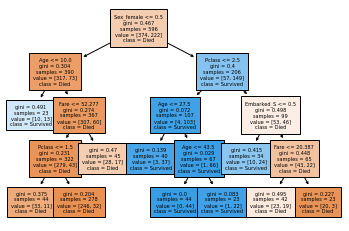

In [69]:

tree.plot_tree(best_clf,
               feature_names=list(X_train),
               class_names=['Died','Survived'],
               filled=True,
               fontsize = 5);

In [70]:
# при дисбалансе классов accuracy не дает представление о точности модели
best_clf.score(X_test,y_test)

0.8067796610169492

In [71]:
# подсчет метрик
from sklearn.metrics import precision_score , recall_score

In [72]:
predictions = best_clf.predict(X_test)

In [73]:
pr_score = precision_score(y_test,predictions)

In [74]:
rec_score = recall_score(y_test, predictions)

In [75]:
pr_score

0.8315789473684211

In [76]:
rec_score

0.6583333333333333

In [77]:
F = pr_score*rec_score/(pr_score+rec_score)

In [78]:
F

0.3674418604651163

In [79]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [80]:
# узнаем вероятности соотнесения к некоторым классам

In [81]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [82]:
y_predicted_prob

array([[0.88489209, 0.11510791],
       [0.88489209, 0.11510791],
       [0.88489209, 0.11510791],
       [0.075     , 0.925     ],
       [0.29411765, 0.70588235],
       [0.075     , 0.925     ],
       [0.29411765, 0.70588235],
       [0.88489209, 0.11510791],
       [0.29411765, 0.70588235],
       [0.075     , 0.925     ],
       [0.62222222, 0.37777778],
       [0.88489209, 0.11510791],
       [0.86956522, 0.13043478],
       [0.88489209, 0.11510791],
       [0.88489209, 0.11510791],
       [0.075     , 0.925     ],
       [0.62222222, 0.37777778],
       [0.29411765, 0.70588235],
       [0.88489209, 0.11510791],
       [0.75      , 0.25      ],
       [0.88489209, 0.11510791],
       [0.75      , 0.25      ],
       [0.54761905, 0.45238095],
       [0.88489209, 0.11510791],
       [0.88489209, 0.11510791],
       [0.43478261, 0.56521739],
       [0.75      , 0.25      ],
       [0.88489209, 0.11510791],
       [0.43478261, 0.56521739],
       [0.54761905, 0.45238095],
       [0.

<AxesSubplot:>

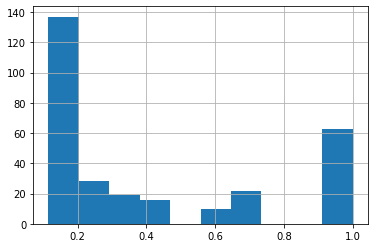

In [83]:
# возьмем только вторую колонку
pd.Series(y_predicted_prob[:,1]).hist()

In [84]:
# максимизация precision ( в класс выживших отправлять тех, у кого вероятность >0.8)

In [85]:
import numpy as np

In [86]:
y_pred = np.where(y_predicted_prob[:,1] > 0.2 , 1 ,0)

In [87]:
precision_score(y_test,y_pred)

0.689873417721519

In [88]:
recall_score(y_test,y_pred)

0.9083333333333333

In [89]:
# нахождение баланса между precision и recall

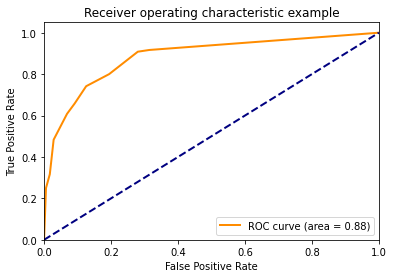

In [90]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [91]:
# true positive - recall
# как часто пассажиров которые не выжили классифицировали как выживших

In [92]:
# Рандомный лес
from sklearn.ensemble import RandomForestClassifier

In [93]:
clf_rf = RandomForestClassifier()

In [94]:
parametrs = {'n_estimators' : [10,20,30],  'max_depth' : [2,5,7,10]}

In [95]:
grid_search_cv_clf = GridSearchCV(clf_rf,parametrs,cv=5)

In [96]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [97]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [98]:
best_clf = grid_search_cv_clf.best_estimator_

In [99]:
best_clf.score(X_test,y_test)

0.8033898305084746

In [103]:
feature_importances = best_clf.feature_importances_
feature_importances

array([0.11685531, 0.13050218, 0.04278592, 0.02084206, 0.14459525,
       0.2208493 , 0.27127967, 0.01952343, 0.0064068 , 0.02636008])

In [101]:
feature_importances_df = pd.DataFrame({'features' : list(X_train),'feature_importances': feature_importances})

In [107]:
# максимально важные параметры для разбиения
feature_importances_df = feature_importances_df.sort_values('feature_importances' , ascending = False)
feature_importances_df

,features,feature_importances
6,Sex_male,0.271280
5,Sex_female,0.220849
4,Fare,0.144595
1,Age,0.130502
0,Pclass,0.116855
2,SibSp,0.042786
9,Embarked_S,0.026360
3,Parch,0.020842
7,Embarked_C,0.019523
8,Embarked_Q,0.006407


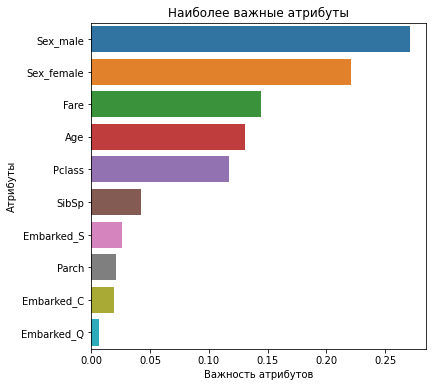

In [110]:
plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()